3.1 Warming Up Exercises - Basic Inspection and Exploration:
Problem 1 - Data Read, Write and Inspect:



In [ ]:
import pandas as pd

#1. Load the dataset and import it into a panda DataFrame
df = pd.read_csv('/content/bank .csv')

#2. Check info of the DataFrame and identify:
#a. Columns with dtype-object
object_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Columns with dtype=object: ", object_columns)

#b. Unique values of those columns
for col in object_columns:
  print(f"Unique values in column '{col}': {df[col].unique()}")

#c. Total number of null values in each column
null_values = df.isnull().sum()
print("Null values in each colum:\n", null_values)

#3. Drop all columns with dtype=object and store in a new Dataframe
numeric_df = df.drop(columns=object_columns)

# Write the new Dataframe to a CSV file
numeric_df.to_csv('banknumericdata.csv', index=False)

#4. Read the 'bank.csv' file and find the summary statistics
numeric_data = pd.read_csv('banknumericdata.csv')
summary_stats = numeric_data.describe()
print("Summary Statistics:\n", summary_stats)


Columns with dtype=object:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Unique values in column 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in column 'marital': ['married' 'single' 'divorced']
Unique values in column 'education': ['tertiary' 'secondary' 'unknown' 'primary']
Unique values in column 'default': ['no' 'yes']
Unique values in column 'housing': ['yes' 'no']
Unique values in column 'loan': ['no' 'yes']
Unique values in column 'contact': ['unknown' 'cellular' 'telephone']
Unique values in column 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in column 'poutcome': ['unknown' 'failure' 'other' 'success']
Unique values in column 'y': ['no' 'yes']
Null values in each colum:
 age          0
job          0
marital      0
education    0
default      0
bala

Problem 2 - Data Imputations:

In [3]:
import pandas as pd

# 1. Load the provided dataset and import it into a pandas DataFrame
df = pd.read_csv('/content/medical_students_dataset.csv')

# 2. Check info of the DataFrame and identify columns with missing (null) values
print("DataFrame Info:\n")
df.info()

# Identify columns with missing values
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("\nColumns with missing values:")
print(missing_columns)

# 3. Fill missing values using different techniques
for column in missing_columns.index:
    if df[column].dtype == 'object':
        # For categorical columns, fill with mode
        mode_value = df[column].mode()[0]
        df[column] = df[column].fillna(mode_value)
        print(f"Filled missing values in '{column}' with mode: {mode_value}")
    else:
        # For numeric columns, fill with mean
        mean_value = df[column].mean()
        df[column] = df[column].fillna(mean_value)
        print(f"Filled missing values in '{column}' with mean: {mean_value}")

# 4. Check for duplicate values and manage them
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Remove duplicate rows if any
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicate rows removed.")

# Save the cleaned DataFrame to a new file
df.to_csv('medical_student_cleaned.csv', index=False)

# Final check for missing values and duplicates
print("\nFinal check for missing values:")
print(df.isnull().sum())

final_duplicates = df.duplicated().sum()
print(f"\nFinal number of duplicate rows: {final_duplicates}")



DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB

Columns with missing values:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Wei

3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:


Dataset Used: "titanic.csv"




Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [ ]:
import pandas as pd

#1. Load the titanic dataset
df= pd.read_csv('/content/Titanic-Dataset.csv')

#2. Create a subset DataFrame with specified columns
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

#3. Filter rows where 'Pclass' is equal to 1 (first-class passengers)
first_class_df = subset_df[subset_df['Pclass']==1]

#4. Calculates mean, median, maximum, and minimum of the 'Fare' column
fare_mean = first_class_df['Fare'].mean()
fare_median = first_class_df['Fare'].median()
fare_max = first_class_df['Fare'].max()
fare_min = first_class_df['Fare'].min()

#5. Display results
print("Fare Statistics for First-class Passengers:")
print(f"Mean Fare: {fare_mean}")
print(f"Median Fare: {fare_median}")
print(f"Maximum Fare: {fare_max}")
print(f"Minimum Fare: {fare_min}")


Fare Statistics for First-class Passengers:
Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


Problem - 2:


How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [ ]:
#Check for null values in the 'Age' column
null_age_count = first_class_df['Age'].isnull().sum()
print(f"Number of null values in 'Age' column: {null_age_count}")

#Drop rows with null values in the 'Age' column
first_class_df_cleaned = first_class_df.dropna(subset=['Age'])

#Confirm that null values are removed
null_age_count_after = first_class_df_cleaned['Age'].isnull().sum()
print(f"Number of null values in 'Age' column after dropping: {null_age_count_after}")


Number of null values in 'Age' column: 30
Number of null values in 'Age' column after dropping: 0


Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton
Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [ ]:
#1. One- hot encode the 'Embarked' column
embarked_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')

#2. Add the new columns to the original DataFrame
df = pd. concat([df, embarked_encoded], axis=1)

#3. Drop the original 'Embarked' column
df.drop(columns=['Embarked'], inplace=True)

#4. Print the first few rows of the modified DatFrame to verify changes
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

Mean Survival Rates by gender: 
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<ipython-input-15-5e10f3ff1258>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, ci=None)


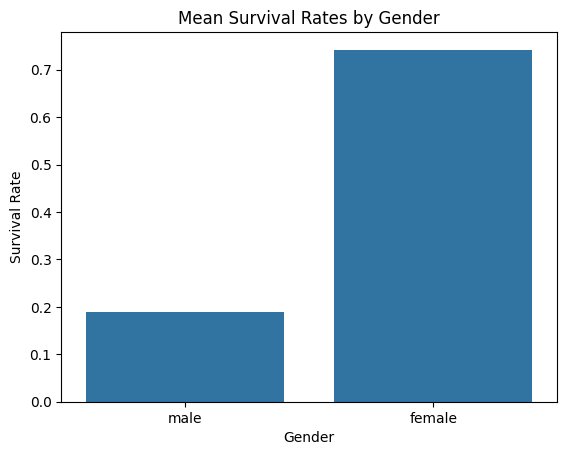

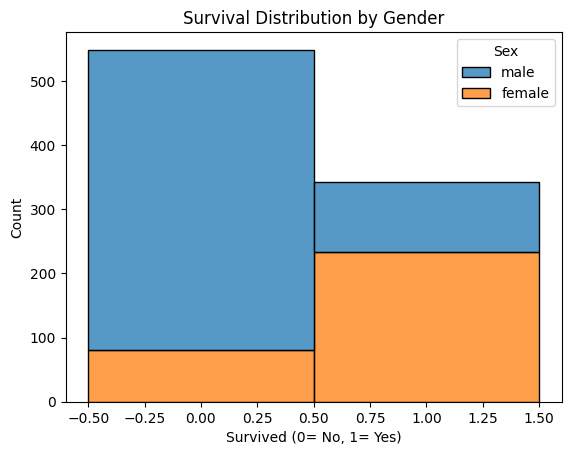

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Calculate mean survival rates for each group in 'Sex'
mean_survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("Mean Survival Rates by gender: ")
print(mean_survival_by_gender)

#Visualize survival distributions by gender using a bar plot
sns.barplot(x='Sex', y='Survived', data=df, ci=None)
plt.title('Mean Survival Rates by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.show()

#Visualize survival distributions using a histogram
sns.histplot(data=df, x='Survived', hue='Sex', multiple='stack', discrete=True)
plt.title('Survival Distribution by Gender')
plt.ylabel('Count')
plt.xlabel('Survived (0= No, 1= Yes)')
plt.show()

Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

Mean Survival Rates by Port and Gender:
Embarked  Sex   
C         female    0.880000
          male      0.305263
Q         female    0.750000
          male      0.073171
S         female    0.689655
          male      0.174603
Name: Survived, dtype: float64


<ipython-input-19-158feaa8ab5e>:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Embarked', y='Survived', hue='Sex', data=df, ci=None)


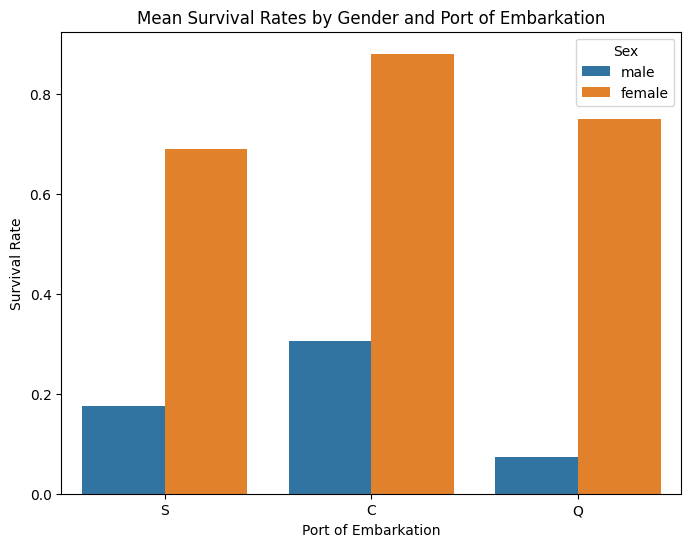

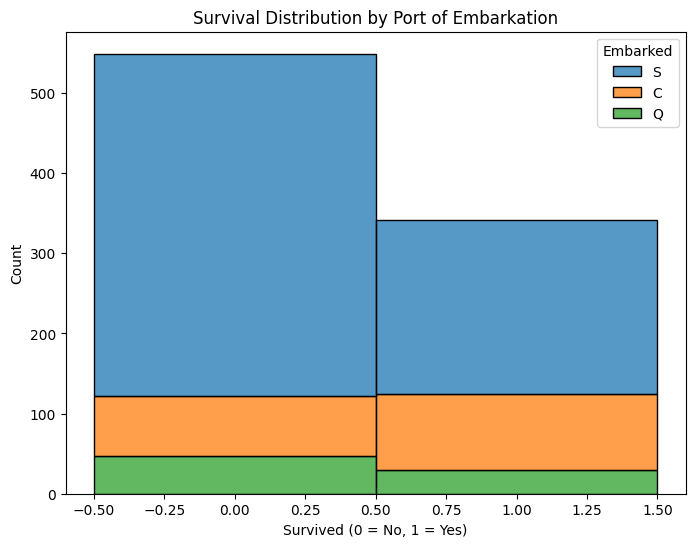

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Check if the 'Embarked' column exists
if 'Embarked' not in df.columns:
    # Check if one-hot encoded columns exist
    if {'Embarked_C', 'Embarked_Q', 'Embarked_S'}.issubset(df.columns):
        # Recreate the 'Embarked' column from one-hot encoding
        df['Embarked'] = (
            df[['Embarked_C', 'Embarked_Q', 'Embarked_S']]
            .idxmax(axis=1)
            .str.split('_')
            .str[-1]
        )
    else:
        raise KeyError("The 'Embarked' column or its one-hot encoded equivalents are missing from the DataFrame.")

# Step 2: Ensure required columns exist
required_columns = {'Embarked', 'Sex', 'Survived'}
missing_columns = required_columns - set(df.columns)
if missing_columns:
    raise ValueError(f"The following required columns are missing: {missing_columns}")

# Step 3: Calculate mean survival rates by gender and port
mean_survival_by_port = df.groupby(['Embarked', 'Sex'])['Survived'].mean()
print("Mean Survival Rates by Port and Gender:")
print(mean_survival_by_port)

# Step 4: Visualize the mean survival rates using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=df, ci=None)
plt.title('Mean Survival Rates by Gender and Port of Embarkation')
plt.ylabel('Survival Rate')
plt.xlabel('Port of Embarkation')
plt.show()

# Step 5: Visualize survival distributions by port of embarkation using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Survived', hue='Embarked', multiple='stack', discrete=True)
plt.title('Survival Distribution by Port of Embarkation')
plt.ylabel('Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.show()


Problem - 6{Optional}:
Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
and age group. Draw a visualization using a any plotting library to represent this graphically.

<ipython-input-20-0dffa28864a0>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().reset_index()
<ipython-input-20-0dffa28864a0>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', hue='Pclass', data=survival_rates, ci=None, palette='viridis')


Mean Survival Rates by Age Group and Pclass:
   AgeGroup  Pclass  Survived
0        Q1       1  0.809524
1        Q1       2  0.742857
2        Q1       3  0.333333
3        Q2       1  0.761905
4        Q2       2  0.400000
5        Q2       3  0.197674
6        Q3       1  0.666667
7        Q3       2  0.416667
8        Q3       3  0.283582
9        Q4       1  0.777778
10       Q4       2  0.461538
11       Q4       3  0.166667
12       Q5       1  0.506667
13       Q5       2  0.363636
14       Q5       3  0.088235


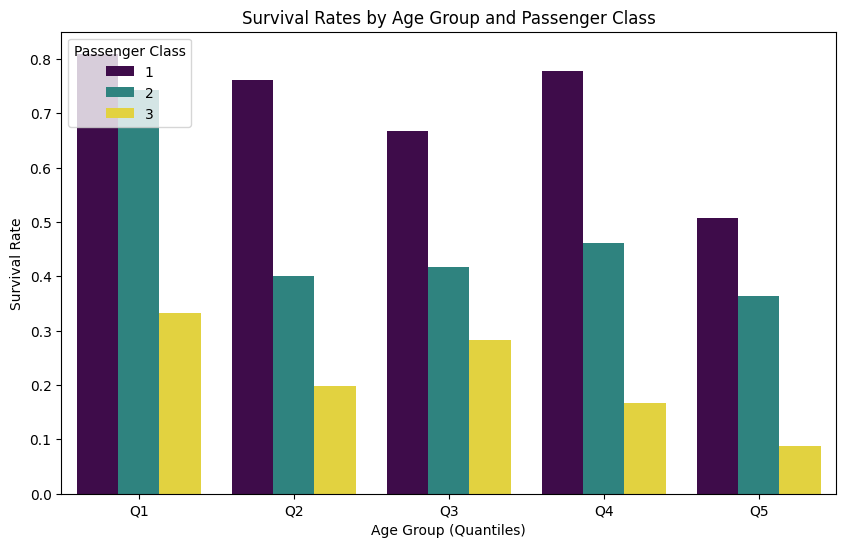

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Ensure 'Age' and 'Pclass' columns exist
required_columns = {'Age', 'Pclass', 'Survived'}
missing_columns = required_columns - set(df.columns)
if missing_columns:
    raise ValueError(f"The following required columns are missing: {missing_columns}")

# Step 2: Divide 'Age' into five quantiles
df['AgeGroup'] = pd.qcut(df['Age'], q=5, labels=["Q1", "Q2", "Q3", "Q4", "Q5"])

# Step 3: Calculate mean survival rates by 'AgeGroup' and 'Pclass'
survival_rates = df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().reset_index()

# Step 4: Print the calculated survival rates
print("Mean Survival Rates by Age Group and Pclass:")
print(survival_rates)

# Step 5: Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', hue='Pclass', data=survival_rates, ci=None, palette='viridis')
plt.title('Survival Rates by Age Group and Passenger Class')
plt.xlabel('Age Group (Quantiles)')
plt.ylabel('Survival Rate')
plt.legend(title='Passenger Class', loc='upper left')
plt.show()
